# Red unidimensional de Kohonen

In [9]:
import math
import numpy as np

# Ejemplo de entrenamiento de la red SOM

Este ejemplo usa un espacio de entrada bi-dimensional, es decir, $N=2$. 

Dejemos que la estructura de la cuadrícula sea unidimensional $G=1$. Además, nuestro SOM de ejemplo debe constar de 7 neuronas y la taza de aprendizaje debe ser $\eta = 0.5$

La función de vecindad es:

$h(i,k,t) =
\begin{cases}
1 & k \text{ vecino directo de }i ,\\ 1 & k=i,\\
0& \text{de otro modo}
\end{cases}$

Ahora tomemos un vistazo a la red mencionada con valores aleatorios inicializados en los centros, al presentar el patrón $p$. Ver siguiente figura:

# Paso 1. Inicialización aleatoria de los pesos

In [10]:
c_k = np.array(
        [[-0.8, 0.9], 
        [0.85, 0.95], 
        [-0.8, -0.8], 
        [-0.8, -0.5], 
        [0.97, -0.8], 
        [0.97, -0.3],
        [-0.2, 0.7]])

<AxesSubplot:>

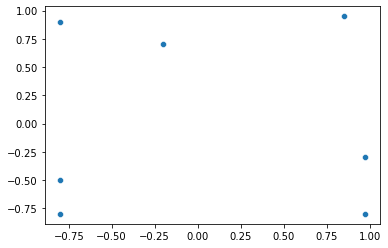

In [11]:
import seaborn as sns

sns.scatterplot(x=c_k[:,0], y=c_k[:,1])

# Paso 2. Presentar patrón en la entrada de la red

In [12]:
p_1 = np.array([-0.3, -0.8])

# Paso 3. Cálcular distancias

In [13]:
d_c1 = math.sqrt((c_k[0][0] - p_1[0])**2 + (c_k[0][1] - p_1[1])**2)
print(d_c1)

d_ck = np.sqrt(np.sum((c_k - p_1)**2, axis= 1))
print(d_ck)

1.7720045146669352
[1.77200451 2.09403916 0.5        0.58309519 1.27       1.36488095
 1.50332964]


# Paso 4. Selección de la neurona ganadora (BMU)

In [14]:
bmu = np.argmin(d_ck, axis= 0)
print(bmu)

2


Obviamente en nuestro ejemplo el patrón de entrada es cercano a la neurona 3, es decir, es la neurona ganadora.

# Paso 5. Adaptar los centros

Recordemos que la regla de aprendizaje para SOM es:

$\Delta c_k = \eta(t) \cdot h(i,k,t)\cdot(p-c_k)$

y procesa los tres factores desde atrás:

**La dirección de aprendizaje**: Recuerda que los centros de las neuronas $c_k$ son vectores en el espacio de entrada, así como el patrón $p$.

Entonces, el factor $(p-c_k)$ indica el vector de la neurona $k$ a el patrón $p$. Esto se multiplica por diferentes escales.

In [15]:
eta = 0.5

Nuestra **función topológica** $h$ indica que solo el ganador y sus dos vecinos cercanos (aquí 2 y 4) son permitidos aprender retornando cero para todas las otras neuronas. Una dependencia de tiempo no esta definida. Por lo tanto, el vector $(p-c_k)$ es multiplicado por 1 o por 0.

La **taza de aprendizaje** indica, como siempre, la fuerza del aprendizaje. Como se mencionó anteriormente, $\eta= 0.5$, es decir, en conjunto, el resultado de la neurona ganadora y sus vecinas (2, 3 y 4) se apróximan al patrón $p$ hasta la mitad (en la figura marcada con flechas).

In [16]:
# Función de vecindad

def h(i, k, t = 0):
    if k == i or k == i - 1 or k == i + 1 :
        return 1
    else:
        return 0

In [17]:
delta_bmu = eta * (p_1 - c_k[bmu])
delta_bmu_prev = eta * (p_1 - c_k[bmu-1])
delta_bmu_next = eta * (p_1 - c_k[bmu+1])



In [18]:
delta_ck = []
for i in range(0, len(c_k)):
    delta = eta * h(bmu, i) * (p_1 - c_k[i])
    delta_ck.append(delta)

print(delta_ck)

[array([ 0., -0.]), array([-0.575, -0.875]), array([0.25, 0.  ]), array([ 0.25, -0.15]), array([-0.,  0.]), array([-0., -0.]), array([-0., -0.])]


In [19]:
c_k += delta_ck
print(c_k)

[[-0.8    0.9  ]
 [ 0.275  0.075]
 [-0.55  -0.8  ]
 [-0.55  -0.65 ]
 [ 0.97  -0.8  ]
 [ 0.97  -0.3  ]
 [-0.2    0.7  ]]


<AxesSubplot:>

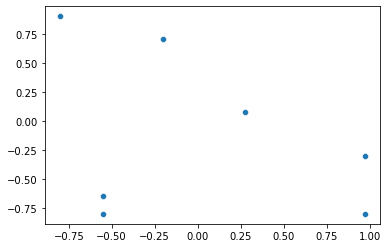

In [20]:
sns.scatterplot(x=c_k[:,0], y=c_k[:,1])